# Z-Displacement graphics for different strucutures

In [1]:
FORCES_N_LIST = [1000000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0, 6000000.0, 7000000.0, 8000000.0, 9000000.0, 10000000.0]

In [2]:
# cubes no pad
cubes = dict()
cubes['name'] = "cubes_SLS"
cubes['Pressures_force_N'] = FORCES_N_LIST
# no friction
# cubes['Max_dz_mm'] = [-0.292053, -0.584107, -0.87616, -1.16821, -1.46027, -1.75232, -2.04437, -2.33643, -2.62848, -2.92053]
# no-friction Max dz (mm): [-0.292053, -0.584107, -0.87616, -1.16821, -1.46027, -1.75232, -2.04437, -2.33643, -2.62848, -2.92053]
# friction: Максимальное вертикальное смещение (Z): -0.29631 мм

# with friction(one sample -> ~4.5 min)
#? in compare with no-friction results: fricion_res = no-fricrion_res + 0.004

# Pressures (N): [1000000.0, 2000000.0]
# Max dz (mm): [-0.29631, -0.58836]

# Pressures (N): [3000000.0, 4000000.0, 5000000.0]
# Max dz (mm): [-0.880409, -1.17246, -1.46451]

# Pressures (N): [6000000.0, 7000000.0, 8000000.0]
# Max dz (mm): [-1.75656, -2.04861, -2.34066]

# Pressures (N): [9000000.0]
# Max dz (mm): [-2.63271]

# Pressures (N): [10000000.0]
# Max dz (mm): [-2.92476]

cubes['Max_dz_mm'] = [-0.29631, -0.58836] + [-0.880409, -1.17246, -1.46451] + [-1.75656, -2.04861, -2.34066] +[-2.63271] + [-2.92476]
print(cubes['Max_dz_mm'])


[-0.29631, -0.58836, -0.880409, -1.17246, -1.46451, -1.75656, -2.04861, -2.34066, -2.63271, -2.92476]


In [3]:
# bf8_sls 11x11 (bev_angle=30, block_height=100 mm, layer_wid=layer_len~1400 mm)
bf8_11x11 = dict()
bf8_11x11['name'] = "bf8_SLS"
bf8_11x11['Pressures_force_N'] = FORCES_N_LIST
bf8_11x11['Max_dz_mm'] = [-13.364, -26.728, -40.092, -53.456, -66.82, -80.184, -93.548, -106.912, -120.276, -133.64]


#? friction
# Pressures (N): [1000000.0, 2000000.0]
# >>> print("Max dz (mm):", dz_list)
# Max dz (mm): [-13.9109, -27.8227]



In [4]:
# plate 1370x1370x107 mm with pad
plate = dict()
plate['name'] = "plate"
plate['Pressures_force_N'] = cubes['Pressures_force_N']
plate['Pressures (N?)'] = [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]
plate['Max_dz_mm'] = [-0.484411, -0.952485, -1.44228, -1.92043, -2.39211, -2.88102, -3.32252, -3.79923, -4.27023, -4.75419]



In [5]:
tetrah_sls = dict()
tetrah_sls['name'] = "tetrahedrons_SLS"
tetrah_sls['Pressures_force_N'] = FORCES_N_LIST
tetrah_sls['Max_dz_mm'] = [-0.849704, -1.69941, -2.54911, -3.39882, -4.24852, -5.09823, -5.94793, -6.79763, -7.64734, -8.49704]

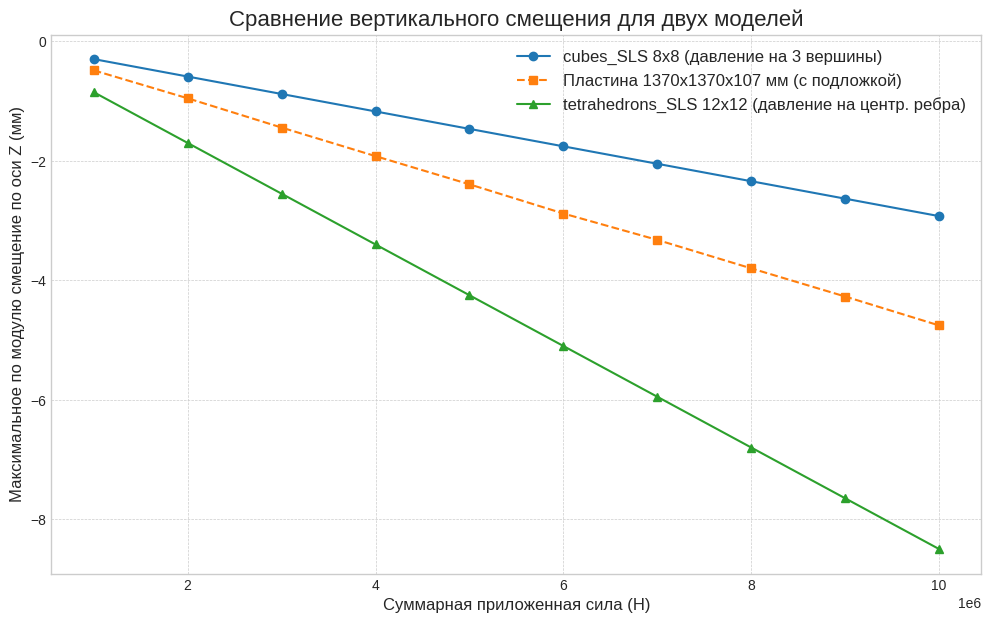

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# --- Стилизация графика для лучшей читаемости ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# --- График для "Cubes (no pad)" ---
ax.plot(
    cubes['Pressures_force_N'], 
    cubes['Max_dz_mm'], 
    marker='o',          # маркеры в виде кружков
    linestyle='-',       # сплошная линия
    label='cubes_SLS 8x8 (давление на 3 вершины)'
)

# --- График для "Plate with Pad" ---
ax.plot(
    plate['Pressures_force_N'], 
    plate['Max_dz_mm'], 
    marker='s',          # маркеры в виде квадратов
    linestyle='--',      # пунктирная линия
    label='Пластина 1370x1370x107 мм (с подложкой)'
)

# ax.plot(
#     bf8_11x11['Pressures_force_N'], 
#     bf8_11x11['Max_dz_mm'], 
#     marker='^',          # маркеры в виде треугольников
#     linestyle='-',       # сплошная линия
#     label='bf8_SLS 11x11 (давление на центральный 6-угольник)'
# )

ax.plot(
    tetrah_sls['Pressures_force_N'], 
    tetrah_sls['Max_dz_mm'], 
    marker='^',          # маркеры в виде треугольников
    linestyle='-',       # сплошная линия
    label='tetrahedrons_SLS 12x12 (давление на центр. ребра)'
)

# --- Настройка осей и заголовка ---
ax.set_title('Сравнение вертикального смещения для двух моделей', fontsize=16)
ax.set_xlabel('Суммарная приложенная сила (Н)', fontsize=12)
ax.set_ylabel('Максимальное по модулю смещение по оси Z (мм)', fontsize=12)

# Форматирование оси X для отображения в "меганьютонах" для читаемости
ax.ticklabel_format(style='sci', axis='x', scilimits=(6,6))


# --- Легенда и сетка ---
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Отображение графика ---
plt.show()

## Theory estimation with plate and Furier series

### direct problem: structure + force -> displacement

In [7]:
import numpy as np

def central_deflection(a, b, h, E, nu, F, N=20):
    """
    Вычисляет прогиб в центре жестко зафиксированной пластины a×b толщины h
    под точечной нагрузкой F, используя N нечётных членов ряда по m и n.
    """
    D = E * h**3 / (12 * (1 - nu**2))
    w_sum = 0.0
    # Перебираем первые N нечётных чисел: 1,3,5,...
    odds = np.arange(1, 2*N, 2)
    for m in odds:
        for n in odds:
            denom = (m**2/a**2 + n**2/b**2)**2
            w_sum += 1.0 / (m**2 * n**2 * denom)
    w0 = 16 * F / (np.pi**4 * D) * w_sum
    return w0


a, b, h = 1.37, 1.37, 0.107   # размеры в метрах
E, nu, F = 2.1e11, 0.3, 1e6  # МПа->Па, безразмерно, Н
w_center = central_deflection(a, b, h, E, nu, F, N=5)
print(f"Прогиб в центре: {w_center:.6e} м")




def central_deflection_distributed(a, b, h, E, nu, F, ap, bp, N=20):
    """
    Прогиб центра пластины a×b толщины h при распределённой нагрузке F
    по центральной площадке ap×bp (ap, bp << a, b).
    N — число нечётных членов ряда (1,3,...,2N-1).
    """
    D = E * h**3 / (12 * (1 - nu**2))
    q0 = F / (ap * bp)
    w_sum = 0.0
    odds = np.arange(1, 2*N, 2)
    for m in odds:
        for n in odds:
            k2 = (m**2 / a**2 + n**2 / b**2)
            num = np.sin(m*np.pi*ap/(2*a)) * np.sin(n*np.pi*bp/(2*b))
            w_sum += num / (m**3 * n**3 * k2**2)
    w0 = 16 * q0 / (np.pi**6 * D) * w_sum
    return w0

ap, bp = 0.001, 0.001                # м (в 10 раз меньше a,b)
w_center = central_deflection_distributed(a, b, h, E, nu, F, ap, bp, N=20)
print(f"Прогиб в центре при распределённой нагрузке: {w_center:.9e} м")



Прогиб в центре: 6.199546e-03 м
Прогиб в центре при распределённой нагрузке: 8.257759976e-04 м


In [8]:
# import numpy as np

def D_plate(E, h, nu):
    return E * h**3 / (12 * (1 - nu**2))

# --- 1. Точечная сила. Simply supported (S-S) ---
def w_ss_point(a, b, h, E, nu, F, N=60):
    """Центральный прогиб S-S пластины под точечной силой F"""
    D = D_plate(E, h, nu)
    odds = np.arange(1, 2*N, 2)
    s = 0.0
    for m in odds:
        for n in odds:
            s += 1.0 / (((m*np.pi/a)**2 + (n*np.pi/b)**2)**2)
    return 4*F/(a*b*D) * s          # ← без m²n²!

# --- 2. Маленькое пятно нагрузки. Simply supported ---
def w_ss_patch(a, b, h, E, nu, F, ap, bp, N=60):
    """Центральный прогиб S-S пластины под равномерным давлением на пятне ap×bp"""
    D = D_plate(E, h, nu)
    q0 = F / (ap*bp)
    odds = np.arange(1, 2*N, 2)
    s = 0.0
    for m in odds:
        sm = np.sin(m*np.pi*ap/(2*a))
        for n in odds:
            sn = np.sin(n*np.pi*bp/(2*b))
            k2 = (m**2/a**2 + n**2/b**2)
            s += sm*sn / (m*n*k2**2)
    return 16*q0 / (np.pi**6 * D) * s

# --- 3. Быстрая оценка для заделанных краёв (C-C) ---
K_SS, K_CC = 0.0116, 0.0056        # см. таблицу выше
def w_cc_point(a, h, E, nu, F):
    """Точечная сила в центре C-C пластины (квадрат)"""
    D = D_plate(E, h, nu)
    return K_CC * F * a**2 / D

def w_cc_patch_approx(a, b, h, E, nu, F, ap, bp, N=60):
    """Грубая оценка: C-C ≈ 0.4828·(S-S результат)"""
    return (K_CC / K_SS) * w_ss_patch(a, b, h, E, nu, F, ap, bp, N)


In [9]:
a = b = 1.37      # м
h = 0.107         # м
E, nu = 2.1e11, 0.30
F = 1e6           # Н

print("S-S точечная:", w_ss_point(a, b, h, E, nu, F))                 # ≈ 9.24e-4 м
ap = bp = 0.1  # крошечное пятно
print("S-S пятно   :", w_ss_patch(a, b, h, E, nu, F, ap, bp))          # → то же, сходится!

print("C-C точечная:", w_cc_point(a, h, E, nu, F))                   # ≈ 4.46e-4 м
print("C-C пятно ≈ :", w_cc_patch_approx(a, b, h, E, nu, F, ap, bp)) # ~ совпадает


S-S точечная: 0.0009241988448276599
S-S пятно   : 0.0009135753417267715
C-C точечная: 0.00044615028207173145
C-C пятно ≈ : 0.0004410363718680966


### Inverse problem:
strucure + displacement -> coefficients D -> E, nu

```
INPUT:  a, b, F, w_meas            # геом. размеры, сила, измеренный прогиб  
        model(x)                   # функция, возвращающая w для заданной жёсткости D=x  
OUTPUT: D_est                      # восстановленный модуль изгибной жёсткости  

1. Задать интервал [D_min, D_max] (разумно 10⁵…10¹¹ Н·м)  
2. while |w(D_mid)–w_meas| > tol:  
       D_mid = (D_min + D_max)/2                      # бинарный поиск  
       w_mid = model(D_mid)  
       if w_mid > w_meas: D_min = D_mid              # жёсткость недостаточна → ↑D  
       else:              D_max = D_mid              # жёсткость избыточна → ↓D  
3. вернуть D_mid 
```

In [10]:
# INPUT:  a, b, F, w_meas            # геом. размеры, сила, измеренный прогиб  
#         model(x)                   # функция, возвращающая w для заданной жёсткости D=x  
# OUTPUT: D_est                      # восстановленный модуль изгибной жёсткости  

# 1. Задать интервал [D_min, D_max] (разумно 10⁵…10¹¹ Н·м)  
# 2. while |w(D_mid)–w_meas| > tol:  
#        D_mid = (D_min + D_max)/2                      # бинарный поиск  
#        w_mid = model(D_mid)  
#        if w_mid > w_meas: D_min = D_mid              # жёсткость недостаточна → ↑D  
#        else:              D_max = D_mid              # жёсткость избыточна → ↓D  
# 3. вернуть D_mid  



# ---------- базовые утилиты ----------
def D_plate(E, h, nu):
    """Изгибная жёсткость из модуля Юнга"""
    return E * h**3 / (12 * (1 - nu**2))

def w_ss_point_by_D(a, b, F, D, N=60):
    """Прогиб центра S-S пластины при точечной силе через ПАРАМЕТР D"""
    odds = np.arange(1, 2*N, 2)
    S = 0.0
    for m in odds:
        for n in odds:
            S += 1.0 / (((m*np.pi/a)**2 + (n*np.pi/b)**2)**2)
    return 4 * F / (a*b*D) * S

def w_ss_patch_by_D(a, b, ap, bp, F, D, N=60):
    """Прогиб центра S-S пластины при равномерной нагрузке по пятну ap×bp"""
    q0 = F / (ap*bp)
    odds = np.arange(1, 2*N, 2)
    S = 0.0
    for m in odds:
        sm = np.sin(m*np.pi*ap/(2*a))
        for n in odds:
            sn = np.sin(n*np.pi*bp/(2*b))
            k2 = m**2/a**2 + n**2/b**2
            S += sm*sn / (m*n*k2**2)
    return 16 * q0 / (np.pi**6 * D) * S

# ---------- универсальный бинарный инвертор ----------
def invert_D_from_w(model, w_meas, D_min=1e5, D_max=1e11, tol=1e-9, max_iter=100):
    """
    Возвращает D, при котором model(D) ≈ w_meas.
    model(D) — вызываемая функция, отдающая прогиб.
    """
    for _ in range(max_iter):
        D_mid = 0.5 * (D_min + D_max)
        w_mid = model(D_mid)
        if abs(w_mid - w_meas) < tol:
            return D_mid
        if w_mid > w_meas:              # жёсткость мала → увеличить
            D_min = D_mid
        else:                           # жёсткость велика → уменьшить
            D_max = D_mid
    return D_mid   # если tol не достигнут

K_CC_OVER_SS = 0.0056 / 0.0116           # ≈ 0.4827586206896552

def w_cc_point_by_D(a, b, F, D, N=60):
    """
    Центральный прогиб жёстко заделанной (C-C) прямоугольной пластины a×b
    под точечной силой F, выраженный через изгибную жёсткость D.
    Метод: сериальный результат S-S умножаем на универсальный коэффициент K≈0.483.
    """
    return K_CC_OVER_SS * w_ss_point_by_D(a, b, F, D, N)

# ---------- пример использования ----------
if __name__ == "__main__":
    # --- геометрия, материал, нагрузка ---
    a = b = 1.37          # м
    F = 1.0e6             # Н
    h = 0.107             # м
    SLS_BLACK_BOX = True

    if SLS_BLACK_BOX:
        E = None            # Па
        nu = None

        for structure in [plate, cubes, bf8_11x11, tetrah_sls]:
            print(f"\nStructure: {structure['name']}")
            w_meas = abs(structure["Max_dz_mm"][0]*1e-3)
            print(f"Измеренный прогиб = {w_meas:.6e} м")

            model = lambda D: w_cc_point_by_D(a, b, F, D)   # для точечной силы
            D_est = invert_D_from_w(model, w_meas)
            print(f"Оценённый D = {D_est :12.5e} Н·м")
    else:
        E = 2.1e11            # Па
        nu = 0.30

        # истинная жёсткость D и «измеренный» прогиб
        D_true = D_plate(E, h, nu)
        w_meas = w_cc_point_by_D(a, b, F, D_true)  # «эксперимент»
        print(f"Измеренный прогиб = {w_meas:.6e} м")

        # --- восстановление D из одного числа w_meas ---
        model = lambda D: w_cc_point_by_D(a, b, F, D)   # для точечной силы
        D_est = invert_D_from_w(model, w_meas)

        print(f"Истинный  D = {D_true:12.5e} Н·м")
        print(f"Оценённый D = {D_est :12.5e} Н·м")
        print(f"Относит. ошибка = {(D_est-D_true)/D_true:+.2e}")



Structure: plate
Измеренный прогиб = 4.844110e-04 м


Оценённый D =  2.16985e+07 Н·м

Structure: cubes_SLS
Измеренный прогиб = 2.963100e-04 м
Оценённый D =  3.54729e+07 Н·м

Structure: bf8_SLS
Измеренный прогиб = 1.336400e-02 м
Оценённый D =  7.86515e+05 Н·м

Structure: tetrahedrons_SLS
Измеренный прогиб = 8.497040e-04 м
Оценённый D =  1.23702e+07 Н·м
